# SGD Classifier





' 확률적 경사 하강법 ' 을 말한다.
SGDClassifier는 SGD 알고리즘을 사용해 선형 분류기(Logistic Regression 분류기)를 **학습시키는 도구**

선형 모델의 파라미터(가중치, 절편)를 최적화하는 방식으로 데이터를 학습하고, 그 결과로 데이터를 선형적으로 구분하는
결정경계(직선, 평면) 등을 생성한다는 뜻입니다.

각 학습마다 모든 배치가 아닌 일부 샘플을 랜덤으로 선택하여 학습에 이용 -> 확률적
" 미니 배치 확률적 경사하강법 " 을 의미한다.

랜덤으로 선택된 n개의 배치를 학습에 이용하여 그것의 평균 경사를 구한다



---


### < logistic regression이 선형 분류기인 이유 >

logistic regression의 핵심은 " 선형 회귀 "로 예측된 값을 logit function과 sigmoid function을 통해 " 비선형으로 변환 "
하는 것이다.

선형 모델
z= wx + b -> 이 식이 데이터를 분류하는 선형 경계를 만든다. 2차원 데이터에서는 직선, 3차원 데이터에서는 평면이 된다.
선형 함수의 결과를 기반으로 경계가 정해지기 때문에 ' 선형 '이다

비선형 모델로 변환 -> 시그모이드 함수를 사용하여 ' 비선형적 ' 변환이 발생한다.
o(z) = 1/ 1+ e^-z


---




## 규제

규제는 머신러닝 모델
에서 과적합을 방지하고 일반화 성능을 개선하기 위해 사용됩니다. 말그대로 학습할때 규제

### L1 규제 (' Lasso ' Regularization)
비용 함수에 가중치 절댓값의 합을 추가한다.  
일부 가중치를 0으로 만들어 불필요한 특성을 제거하고 희소 모델을 생성한다.

-> 너무 많은 특성을 학습하면, 실제로 중요한 패턴 뿐만 아니라 데이터에 포함된 잡음까지 학습할 수 있다.


### L2 규제 (' Ridge ' Regularization)
비용 함수에 가중치 제곱합을 추가한다.
가중치를 0에 가깝게 줄이며, 가중치가 너무 커지는 것을 방지한다.

-> 가중치의 값이 커지면 모델이 민감하게 반응하고 과적합 할 수 있기 때문에

### Elastic Net
L1 과 L2 규제를 결합하는 방식이다.
L1의 희소성과 L2의 안정성을 동시에 얻을 수 있다.

- **Problem**

seaborn 라이브러리에 있는 데이터셋 'exercise' 를 사용하여, 분류기를 학습시키고
diet 상태를 이진 분류 시켜보자.

- **Solution**

'time', 'pulse', 'kind'를 입력 데이터로 받고, 'diet'를 라벨 데이터로 사용한다.

- **Result**

테스트 데이터 셋에서 정확도 65퍼센트를 기록했다. 충분하지 않은 학습 데이터가 원인으로 보인다.

1. **기본 라이브러리**

In [ ]:
import numpy as np
import pandas as pd


2. **데이터셋 가져오기**

In [ ]:
import seaborn as sns

sns.get_dataset_names()
exercise = sns.load_dataset('exercise')

print(exercise.shape)
print(exercise)


(90, 6)
    Unnamed: 0  id     diet  pulse    time     kind
0            0   1  low fat     85   1 min     rest
1            1   1  low fat     85  15 min     rest
2            2   1  low fat     88  30 min     rest
3            3   2  low fat     90   1 min     rest
4            4   2  low fat     92  15 min     rest
..         ...  ..      ...    ...     ...      ...
85          85  29   no fat    135  15 min  running
86          86  29   no fat    130  30 min  running
87          87  30   no fat     99   1 min  running
88          88  30   no fat    111  15 min  running
89          89  30   no fat    150  30 min  running

[90 rows x 6 columns]


3. 데이터 전처리

입력 데이터 X -> features로 pulse, time, kind를 사용

결과 데이터 Y -> diet를 사용




In [ ]:
def strip_minutes(x):
  result = x.strip('min')
  return int(result)


In [ ]:
exercise['diet'] = exercise['diet'].map({'low fat':1, 'no fat':0 })
# print(exercise['diet'])

exercise['kind'] = exercise['kind'].map({'rest': 0, 'running': 1})
exercise['kind'].fillna(value = exercise['kind'].mean(), inplace = True)
# print(exercise['kind'])

exercise['time'] = exercise['time'].apply(lambda x: strip_minutes(x))
# print(exercise['time'])

exercise['pulse'] = exercise['pulse'].apply(lambda x: int(x))
# print(exercise['pulse'])

features = exercise[['time','pulse', 'kind']]
print(features)

diets = exercise[['diet']]
print(diets)

   time  pulse  kind
0     1     85   0.0
1    15     85   0.0
2    30     88   0.0
3     1     90   0.0
4    15     92   0.0
..  ...    ...   ...
85   15    135   1.0
86   30    130   1.0
87    1     99   1.0
88   15    111   1.0
89   30    150   1.0

[90 rows x 3 columns]
   diet
0     1
1     1
2     1
3     1
4     1
..  ...
85    0
86    0
87    0
88    0
89    0

[90 rows x 1 columns]


<ipython-input-4-62540d7cda77>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  exercise['kind'].fillna(value = exercise['kind'].mean(), inplace = True)


4. Train 데이터, Test 데이터 셋 분리하기

In [ ]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, diets)
# train_test_split은 X_train, X_test, Y_train, Y_test 순서로 나온다.

print(train_features.columns) # 컬럼 수 확인
print(train_features.shape)

print(test_features.columns)
print(test_features.shape)

Index(['time', 'pulse', 'kind'], dtype='object')
(67, 3)
Index(['time', 'pulse', 'kind'], dtype='object')
(23, 3)


5. 데이터 정규화하기

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train_features)
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)


6. 모델 생성 / 학습 시키기 (logistic regression)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column

Accuracy: 0.65


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


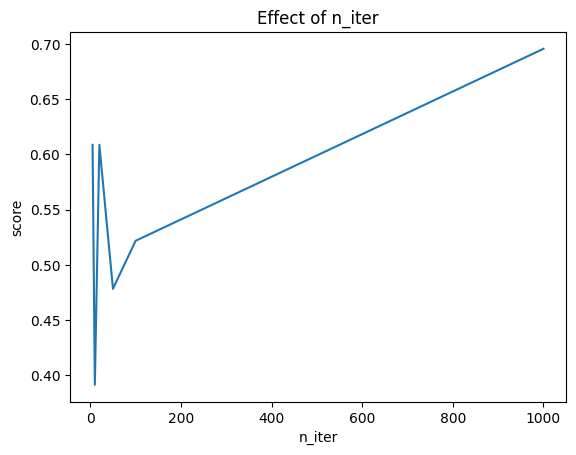

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

model_sgd = SGDClassifier(loss="log_loss", penalty="l2")
model_sgd.fit(train_features, train_labels)

y_predict = model_sgd.predict(test_features)
print('Accuracy: {:.2f}'.format(accuracy_score(test_labels, y_predict)))

n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    model_sgd = SGDClassifier(loss="log_loss", penalty="l2", max_iter=n_iter)
    model_sgd.fit(train_features, train_labels)
    scores.append(model_sgd.score(test_features, test_labels))

plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores)